
# Lab: Linear Regression

## Modules

The `import` statement is used to load *modules* or *libraries*, or groups of  functions and data sets that are not included in the base `Python` enviroment. 
Here we load the several packages, which include a very large collection of data sets and functions. The data sets associated with this book can be found in the `data` directory.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

If you receive an error message when loading any of these libraries, it
likely indicates that the corresponding library has not yet been
installed on your system. If you installed the Anaconda distribution, most
libraries used in these labs should be included. If needed you can install
additional packages using either the `conda` package manager available from the
Anaconda Python distributions, or `pip`.

For example, if pandas were not available you could install it with
```
!conda install pandas
```
or
```
!pip install pandas
```
in a code cell.

The exclamation mark at the beggining of the statement instructs Jupyter to excecute the statement using the system shell.

## Simple Linear Regression

The `Boston`  data set is available from the data directory, which
records `medv` (median house value) for $506$ census tracts in Boston. We will seek to predict `medv` using $12$ predictors such as `rmvar` (average number of  rooms per house), `age` (proportion of owner occupied units built prior to 1940), and `lstat` (percent of households with low socioeconomic status).

In [4]:
Boston = pd.read_csv('data/Boston.csv', index_col=0)
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


We will start by using the `OLS()` function from the `statsmodels` module to fit a simple  linear regression model, with `medv` as the response and `lstat` as the predictor. Since we will be using other modules, instead of using the formula API, which is similar to how things are done in R, we will be handling the data matrix ourselves.

In [7]:
import statsmodels.api as sm

In [107]:
y = Boston.medv
X = Boston.lstat
# We need to add the intercept manually
X = sm.add_constant(X)
X.head()

,const,lstat
1,1.0,4.98
2,1.0,9.14
3,1.0,4.03
4,1.0,2.94
5,1.0,5.33


In [108]:
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           5.08e-88
Time:                        11:51:22   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For more detailed information, we used `summary()` method. This gives us $p$-values and standard errors for the coefficients, as well as the $R^2$ statistic and $F$-statistic for the model.

We can use the `dir()` function in order to find out what other pieces of information  are stored in `lm`.

In [16]:
dir(lm)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

In [17]:
lm.params

const    34.553841
lstat    -0.950049
dtype: float64

In order to obtain a confidence interval for the coefficient estimates, we can use the `confint()` method.

In [19]:
lm.conf_int(alpha=0.05)

,0,1
const,33.448457,35.659225
lstat,-1.026148,-0.873951


The `get_prediction()` function can be used to produce confidence intervals and prediction intervals for the prediction of `medv` for a given value of `lstat`.

In [30]:
pred = lm.get_prediction(pd.DataFrame({'const': [1,1,1], 'lstat': [5, 10, 15]}))
pred.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


For instance, the 95\,\% confidence interval associated with a `lstat` value of 10 is $(24.47, 25.63)$, and the 95\,\% prediction interval is $(12.828, 37.28)$.
As expected, the confidence and prediction intervals are centered around the same point (a predicted value of $25.05$ for `medv` when `lstat` equals 10), but the latter are substantially wider.

We will now plot `medv` and `lstat` along with the least squares regression line using matplotlib.

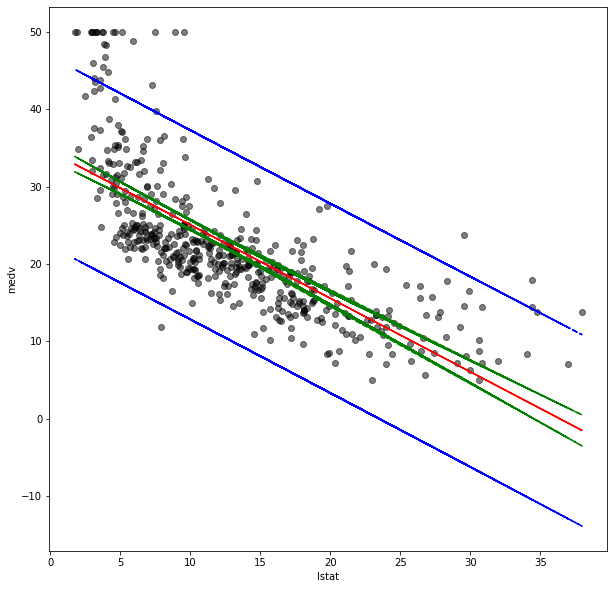

In [45]:
pred_df = lm.get_prediction().summary_frame()

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(X.lstat, y, "ko", alpha=0.5, label="data")
ax.plot(X.lstat, lm.fittedvalues, "r-", label="OLS")
ax.plot(X.lstat, pred_df.mean_ci_lower, "g--")
ax.plot(X.lstat, pred_df.mean_ci_upper, "g--")
ax.plot(X.lstat, pred_df.obs_ci_lower, "b--")
ax.plot(X.lstat, pred_df.obs_ci_upper, "b--")
ax.set_xlabel('lstat')
ax.set_ylabel('medv');

There is some evidence for non-linearity in the relationship between `lstat` and `medv`. We will explore this issue  later in this lab.

Next we examine some diagnostic plots, several of which were discussed
in Section 3.3.3.

In [73]:
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

In [109]:
def reg_plots(lm):
    y_true = lm.model.endog
    y_predict = np.array(lm.fittedvalues)
    xvar = lm.model.exog
    xvar_names = lm.model.exog_names
    residual = np.array(lm.resid)
    influence = lm.get_influence()
    residual_norm = influence.resid_studentized_internal
    leverage = influence.hat_matrix_diag
    cooks_distance = influence.cooks_distance[0]
    nparams = len(lm.params)

    fig, axes = plt.subplots(2, 2, figsize=(10,10))

    ### Residual plot
    ax = axes[0, 0]
    sns.residplot(
        x=y_predict,
        y=residual,
        lowess=True,
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)
    ax.set_title('Residuals vs Fitted', fontweight="bold")
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

    #### qq plot
    ax = axes[0, 1]
    QQ = ProbPlot(residual_norm)
    QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)
    ax.set_title('Normal Q-Q', fontweight="bold")
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Standardized Residuals')

    ### Scale location
    ax = axes[1, 0]
    residual_norm_abs_sqrt = np.sqrt(np.abs(residual_norm))
    ax.scatter(y_predict, residual_norm_abs_sqrt, alpha=0.5)
    sns.regplot(
        x=y_predict,
        y=residual_norm_abs_sqrt,
        scatter=False, ci=False,
        lowess=True,
        line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
        ax=ax)
    ax.set_title('Scale-Location', fontweight="bold")
    ax.set_xlabel('Fitted values')
    ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$')

    #### Residual - Leverage
    ax = axes[1, 1]
    ax.scatter(leverage, residual_norm, alpha=0.5)
    sns.regplot(
        x=leverage,
        y=residual_norm,
        scatter=False,
        ci=False,
        lowess=True,
        line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
        ax=ax)
    # annotations
    leverage_top_3 = np.flip(np.argsort(cooks_distance), 0)[:3]
    for i in leverage_top_3:
        ax.annotate(
            i,
            xy=(leverage[i], residual_norm[i]),
                color = 'C3')
    #ax.set_xlim(0, max(self.leverage)+0.01)
    ax.set_title('Residuals vs Leverage', fontweight="bold")
    ax.set_xlabel('Leverage')
    ax.set_ylabel('Standardized Residuals');

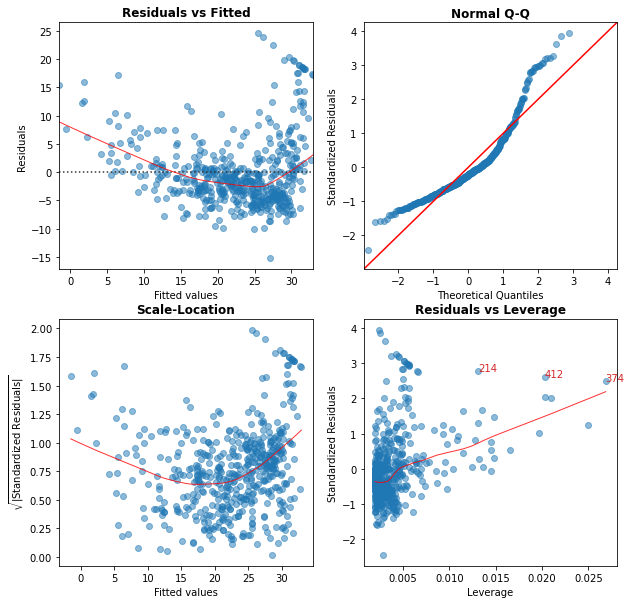

In [110]:
reg_plots(lm)

Alternatively, we can compute the residuals from a linear regression
fit using the `residuals()` function. The function
`rstudent()` will return the studentized residuals, and we
can use this function to plot the residuals against the fitted values.

On the basis of the residual plots, there is some evidence of non-linearity.

In [111]:
influence = lm.get_influence()
residual_norm = influence.resid_studentized_internal
leverage = influence.hat_matrix_diag
np.argmax(leverage)

374

The `arg_max()` function identifies the index of the largest element of a vector. In this case, it tells us which observation has the largest leverage statistic.

## Multiple Linear Regression

In order to fit a multiple linear regression model using least squares,we add the predictors to the data matrix.
The `summary()` function now outputs the regression coefficients for all the predictors.

In [86]:
y = Boston.medv
X = Boston[['lstat', 'age']]
# We need to add the intercept manually
X = sm.add_constant(X)
X.head()

,const,lstat,age
1,1.0,4.98,65.2
2,1.0,9.14,78.9
3,1.0,4.03,61.1
4,1.0,2.94,45.8
5,1.0,5.33,54.2


In [87]:
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           2.98e-88
Time:                        10:27:01   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The `Boston` data set contains 12 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors.
Instead, we can use the following short-hand:

In [88]:
y = Boston.medv
X = Boston[Boston.columns.drop('medv')]
# We need to add the intercept manually
X = sm.add_constant(X)
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          2.23e-133
Time:                        10:28:36   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can access the individual components of a fitted model as attributes and methods. For a list of available options for regression, refer to the statsmodels [documentation](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html). Hence
`lm.rsquared` gives us the $R^2$, and
`np.sqrt(lm.mse_resid)` gives us the RSE.
The `variance_inflation_factor`
function can be used to compute variance
inflation factors.   Most VIF's are
low to moderate for this data.

In [97]:
lm.rsquared

0.7343070437613077

In [100]:
np.sqrt(lm.mse_resid)

4.798034335596366

In [102]:
X

,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
1,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
2,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
3,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
4,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
503,1.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
504,1.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
505,1.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,const,535.526619
1,crim,1.767486
2,zn,2.298459
3,indus,3.987181
4,chas,1.071168
5,nox,4.369093
6,rm,1.912532
7,age,3.088232
8,dis,3.954037
9,rad,7.445301


What if we would like to perform a regression using all of the variables but one?  For example, in the above regression output,  `age` has a high $p$-value. So we may wish to run a regression excluding this predictor.
 The following syntax results in a regression using all predictors except `age`.

In [104]:
y = Boston.medv
X = Boston[Boston.columns.drop(['medv', 'age'])]
# We need to add the intercept manually
X = sm.add_constant(X)
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     124.1
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          2.03e-134
Time:                        10:51:50   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     494   BIC:                             3085.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.5251      4.920      8.441      0.000      31.859      51.191
crim          -0.1214      0.033     -3.683      0.000      -0.186      -0.057
zn             0.0465      0.014      3.379      0.001       0.019       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.135
chas           2.8528      0.868      3.287      0.001       1.148       4.558
nox          -18.4851      3.714     -4.978      0.000     -25.782     -11.188
rm             3.6811      0.411      8.951      0.000       2.873       4.489
dis           -1.5068      0.193     -7.825      0.000      -1.885      -1.128
rad            0.2879      0.067      4.322      0.000       0.157       0.419
tax           -0.0127      0.004     -3.333      0.001      -0.020      -0.005
ptratio       -0.9346      0.132     -7.099      0.000      -1.193      -0.676
lstat         -0.5474      0.048    -11.483      0.000      -0.641      -0.454
==============================================================================
Omnibus:                      172.506   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.941
Skew:                           1.485   Prob(JB):                    3.81e-158
Kurtosis:                       8.056   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interaction Terms

It is easy to include interaction terms in a linear model by including the interaction columns in the data matrix.

In [105]:
y = Boston.medv
X = Boston[['lstat', 'age']].copy()
X['lstat:age'] = X.lstat * X.age
# We need to add the intercept manually
X = sm.add_constant(X)
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           4.86e-88
Time:                        10:55:57   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Non-linear Transformations of the Predictors

We can also accommodate for non-linear transformations of the predictors. For instance, given a predictor $X$, we can create a predictor $X^2$ adding the respective column to the data matrix.
We now perform a regression of `medv` onto `lstat` and `lstat^2`.

In [112]:
y = Boston.medv
X = Boston[['lstat']].copy()
X['lstat^2'] = X.lstat ** 2
# We need to add the intercept manually
X = sm.add_constant(X)
lm2 = sm.OLS(y, X).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          1.56e-112
Time:                        11:57:25   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.000      41.149      44.575
lstat         -2.3328      0.124    -18.843      0.000      -2.576      -2.090
lstat^2        0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The near-zero $p$-value associated with the quadratic term suggests that it leads to an improved model.
We use the `anova()` function  to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [113]:
y = Boston.medv
X = Boston[['lstat']].copy()
# We need to add the intercept manually
X = sm.add_constant(X)
lm1 = sm.OLS(y, X).fit()

In [114]:
sm.stats.anova_lm(lm1, lm2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


Here Model 0 represents the linear submodel containing only one predictor, `lstat`, while Model 1 corresponds to the larger quadratic model that has two predictors, `lstat` and `lstat^2`.
The `anova()` function performs a hypothesis test
comparing the two models. The   null hypothesis is that the two models fit the data equally well,  and the alternative hypothesis is that the full model is superior. Here the $F$-statistic is $135$
 and the associated $p$-value is virtually zero. This provides very clear evidence that the model containing the predictors `lstat` and `lstat^2` is far superior to the model that only contains the predictor `lstat`.
 This is not surprising, since earlier we saw evidence for non-linearity in the relationship between `medv` and `lstat`. If we type

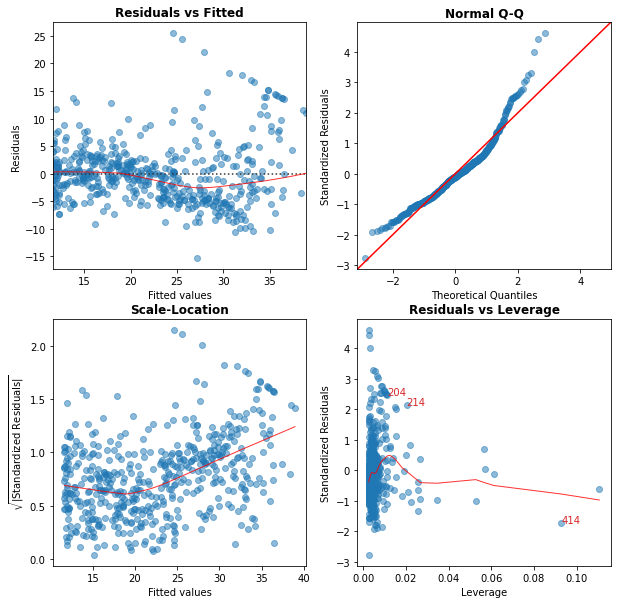

In [115]:
reg_plots(lm2)

 then we see that when the `lstat^2` term is included in the model, there is little discernible pattern in the residuals.

In order to create a cubic fit, we can include a predictor of the form `I(X^3)`. However, this approach can start to get cumbersome for higher-order polynomials. A better approach involves using the `PolynomialFeatures` function to create the polynomial data matrix. For example, the following commands produces a
fifth-order polynomial fit:

In [116]:
from sklearn.preprocessing import PolynomialFeatures

In [124]:
X = Boston[['lstat']]
transformer = PolynomialFeatures(degree=5)
X = transformer.fit_transform(X)
X = pd.DataFrame(X, columns=transformer.get_feature_names_out(), index=Boston.index)
X.head()

,1,lstat,lstat^2,lstat^3,lstat^4,lstat^5
1,1.0,4.98,24.8004,123.505992,615.059840,3062.998004
2,1.0,9.14,83.5396,763.551944,6978.864768,63786.823981
3,1.0,4.03,16.2409,65.450827,263.766833,1062.980336
4,1.0,2.94,8.6436,25.412184,74.711821,219.652754
5,1.0,5.33,28.4089,151.419437,807.065599,4301.659644


In [125]:
lm5 = sm.OLS(y, X).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          8.73e-122
Time:                        12:03:46   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1             67.6997      3.604     18.783      0.000      60.618      74.781
lstat        -11.9911      1.526     -7.859      0.000     -14.989      -8.994
lstat^2        1.2728      0.223      5.703      0.000       0.834       1.711
lstat^3       -0.0683      0.014     -4.747      0.000      -0.097      -0.040
lstat^4        0.0017      0.000      4.143      0.000       0.001       0.003
lstat^5    -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This suggests that including additional  polynomial terms, up to fifth order, leads to an improvement in the model fit! However, further investigation of the data reveals that no polynomial terms beyond fifth order have significant $p$-values
in a regression fit.

Of course, we are in no way restricted to using polynomial transformations of the predictors. Here we try a log transformation.

In [130]:
y = Boston.medv
X = pd.Series(np.log(Boston.rm), name='log(rm)')
# We need to add the intercept manually
X = sm.add_constant(X)
lmlog = sm.OLS(y, X).fit()
lmlog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           1.22e-64
Time:                        12:12:00   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -76.4878      5.028    -15.213      0.000     -86.366     -66.610
log(rm)       54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Qualitative Predictors

We will now examine the `Carseats` data. We will  attempt to predict `Sales`
(child car seat sales) in $400$ locations based on a number of
predictors.

In [132]:
Carseats = pd.read_csv('data/Carseats.csv')
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


The `Carseats` data includes qualitative predictors such as `shelveloc`, an indicator of the quality of the shelving location---that is, the  space within a store in which the car seat is displayed---at each location. The predictor `shelveloc` takes on three possible values:  *Bad*, *Medium*, and *Good*. Given a qualitative variable such as `shelveloc`, we need to generates dummy variables. We use `drop_first=True` to avoid using all levels for categorical variables, removing the first category, this removed category is taken as the baseline.

In [137]:
X = pd.get_dummies(Carseats.drop(columns='Sales'), drop_first=True)
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,0,0,1,1
1,111,48,16,260,83,65,10,1,0,1,1
2,113,35,10,269,80,59,12,0,1,1,1
3,117,100,4,466,97,55,14,0,1,1,1
4,141,64,3,340,128,38,13,0,0,1,0


Below we fit a multiple regression model that includes some interaction terms.

In [138]:
y = Carseats.Sales
X['Income:Advertising'] = X.Income * X.Advertising
X['Price:Age'] = X.Price * X.Age
# We need to add the intercept manually
X = sm.add_constant(X)
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          6.14e-166
Time:                        12:26:14   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.5756      1.009      6.519      0.000       4.592       8.559
CompPrice              0.0929      0.004     22.567      0.000       0.085       0.101
Income                 0.0109      0.003      4.183      0.000       0.006       0.016
Advertising            0.0702      0.023      3.107      0.002       0.026       0.115
Population             0.0002      0.000      0.433      0.665      -0.001       0.001
Price                 -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                   -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education             -0.0209      0.020     -1.063      0.288      -0.059       0.018
ShelveLoc_Good         4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc_Medium       1.9533      0.126     15.531      0.000       1.706       2.201
Urban_Yes              0.1402      0.112      1.247      0.213      -0.081       0.361
US_Yes                -0.1576      0.149     -1.058      0.291      -0.450       0.135
Income:Advertising     0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age              0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We have created a `ShelveLoc_Good` dummy variable that takes on a value of 1 if the shelving location is good, and 0 otherwise. We have also created a `ShelveLoc_Medium` dummy variable that equals 1 if the shelving location is medium, and 0 otherwise.
A bad shelving location corresponds to a zero for each of the two dummy variables.
The fact that the coefficient for `ShelveLoc_Good` in the regression output is positive indicates that a good shelving location is associated with high sales (relative to a bad location). And `ShelveLoc_Medium` has a smaller positive coefficient, indicating that a medium shelving location is associated with higher sales than a bad shelving location but lower sales than a good shelving location.